<a href="https://colab.research.google.com/github/Samini-2/Samini/blob/main/Trial_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Importing Pandas for data manipulation
import numpy as np # Importing numpy for numerical operations
import plotly.express as px # importing Plotly express for interactive visualizations
import plotly.graph_objects as go # importing Plotly Graph Objects for advanced visualizations
import bokeh.plotting as bp # Importing Bokeh for web-based interactive visualizations
import altair as alt # importing altair for declarative data visualization
import seaborn as sns # importing seaborn for statistical data visualization
import matplotlib.pyplot as plt # importing matplotlib for standard plotting
from scipy import stats # importing Scipy for statistical analysis
from statsmodels.tsa.arima.model import ARIMA # importing ARIMA model for time series forecasting
import geopandas as gpd # importing GeoPandas for handling spatial data
import folium # importing Folium for interactive map visualizations

In [ ]:
# Step 1: Load Dataset (CSV file will be created separately)
df = pd.read_csv('/content/NFLX_2002-05-23_2025-01-31.csv')  # Reading dataset into a pandas DataFrame
print("Original Data :")
print(df.head())  # Display the first 5 rows of the dataset

Original Data :
         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


In [ ]:
#1.3.1 Understanding Data Structure
print(df.head()) #

         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200


In [ ]:
# 1.3.2 Handling Missing Data
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


\

In [ ]:
# 1.3.3 Calculating Summary Statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  5710.000000  5710.000000  5710.000000  5710.000000  5710.000000   
mean    158.724558   161.062392   156.335581   158.756151   158.756151   
std     208.336043   211.079642   205.499460   208.330538   208.330538   
min       0.377857     0.410714     0.346429     0.372857     0.372857   
25%       4.251786     4.343928     4.168214     4.255000     4.255000   
50%      43.982857    44.496429    42.891428    43.815001    43.815001   
75%     306.294998   311.722504   300.932503   305.962494   305.962494   
max     998.030029   999.000000   970.010010   984.859985   984.859985   

             Volume  
count  5.710000e+03  
mean   1.532551e+07  
std    1.846796e+07  
min    2.856000e+05  
25%    5.487625e+06  
50%    9.547800e+06  
75%    1.823562e+07  
max    3.234140e+08  


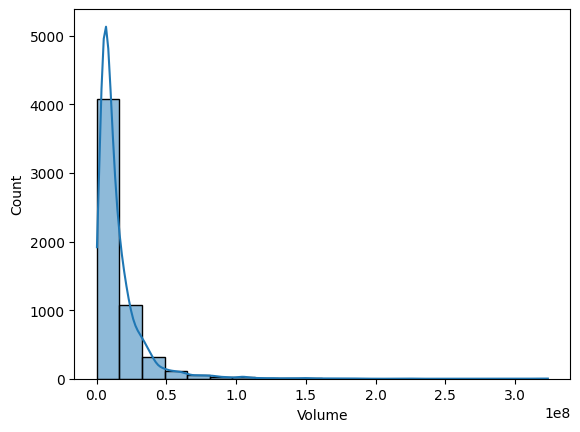

In [ ]:
# 1.3.4 Data Visualization Basics
sns.histplot(df['Volume'],bins=20,kde=True) #
plt.show() # Displayting the plot

In [ ]:
#2. Advanced Data Visitualization
#2.1.2 Creating interactive Charts with Plotly
fig=px.scatter(df, x='Open',y='Close',color='High',title='NFLX')# Creating an interactive scatter plot
fig.show()# Displaying the scatter plot

In [ ]:
fig=px.bar(df, x='Open', y='Close', color='High', title='NFLX') # Creating an interactive bar chart
fig.show()# Displaying the bar chart

In [ ]:
fig= px.line(df.groupby('Open')['Close'].mean().reset_index(),x='Open',y='Close', title='Avg NFLX')# Creating an interactive line chart
fig.show()# Displaying the line chart

In [ ]:
# 3. Statistical Methods for EDA
# 3.1 Key Statistics
print("Mean:",df['Volume'].mean)
print("Variance:",df['Volume'].var())
print("Correlation Matrix:\n",df.select_dtypes(include=[np.number]).corr())

Mean: <bound method Series.mean of 0       104790000
1        11104800
2         6609400
3         6757800
4        10154200
          ...    
5705      4550400
5706      4634200
5707      3434000
5708      2930700
5709      3864600
Name: Volume, Length: 5710, dtype: int64>
Variance: 341065499428900.44
Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999871  0.999872  0.999727   0.999727 -0.310756
High       0.999871  1.000000  0.999842  0.999876   0.999876 -0.309710
Low        0.999872  0.999842  1.000000  0.999880   0.999880 -0.311835
Close      0.999727  0.999876  0.999880  1.000000   1.000000 -0.310667
Adj Close  0.999727  0.999876  0.999880  1.000000   1.000000 -0.310667
Volume    -0.310756 -0.309710 -0.311835 -0.310667  -0.310667  1.000000


In [ ]:
#3.2 Hypothesis Testing
t_stat, p_value =stats.ttest_ind(df[df['Close']=='Volume']['Open'],df[df['Close']=='Volume']['Open']) # Perfoming a t-test to compare means between male
print(f"t-test p-value: {p_value}") # Printing the p-value from the t-test

t-test p-value: nan


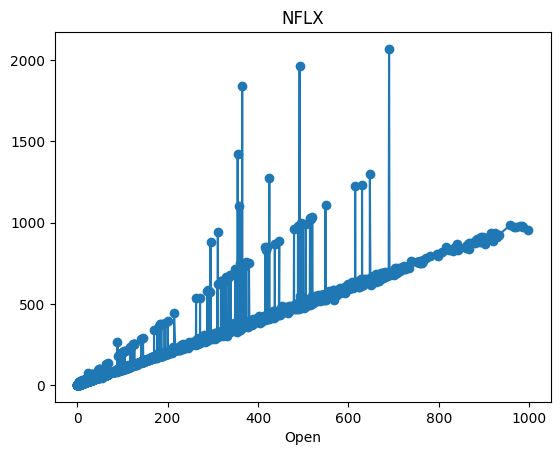

In [ ]:
#4. Time Series and Spatial Data Analysis
# 4.1 Time Series Analysis
ts_data=df.groupby('Open')['Close'].sum()# Aggregating number of courses per study
ts_data.plot(title='NFLX', marker='o')# Plotting the number pf courses  over time study
plt.show()# Displaying the time Series Plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot